# Matplotlib Box Plot

## Importing libraries & Loading DataFrame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

df = pd.read_csv('C:/Users/DELL/Desktop/SQL/Data_analysis/data_jobs.csv')

## Data Cleanup

In [2]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x) # This transforms the string into a list  


## Getting only data analyst jobs in the USA

In [3]:
# Getting only data analyst jobs in the USA
df_da_usa = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] =='United States')].copy()
#df_da_usa['salary_year_avg']
# Droping the NaN values from the column for plotting
df_da_usa = df_da_usa.dropna(subset=['salary_year_avg'])
df_da_usa['salary_year_avg'].sample(10) # This outputs sample data


215912    115000.0
190496     60000.0
611647     85600.0
586967    137610.0
638716    115000.0
404517    105000.0
542392    100774.5
745626     85000.0
721251    107800.0
218063     97070.5
Name: salary_year_avg, dtype: float64

## Plotting 

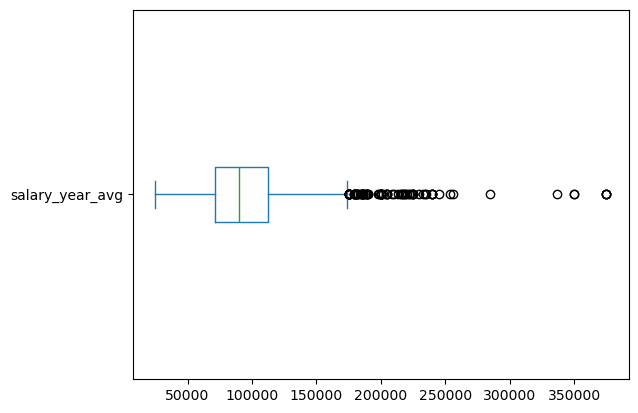

In [4]:
# Plotting the box plot
# plt.boxplot(df_da_usa['salary_year_avg']) # This is an alternative
df_da_usa['salary_year_avg'].plot(kind='box', vert=False)
plt.show()

In [5]:
# Specifying the list of job titles
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
# Filtering the data to appropriate job_titles
df_usa = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] =='United States')].copy()
# df_da_usa['job_title_short'].value_counts()
# df_usa['salary_year_avg']
# Dropping NaN values of the column salary_year_avg
df_usa = df_usa.dropna(subset=['salary_year_avg'])
df_usa 

job_list = [df_usa[df_usa['job_title_short']==job_title]['salary_year_avg'] for job_title  in job_titles]

In [51]:
job_list[0] 

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64

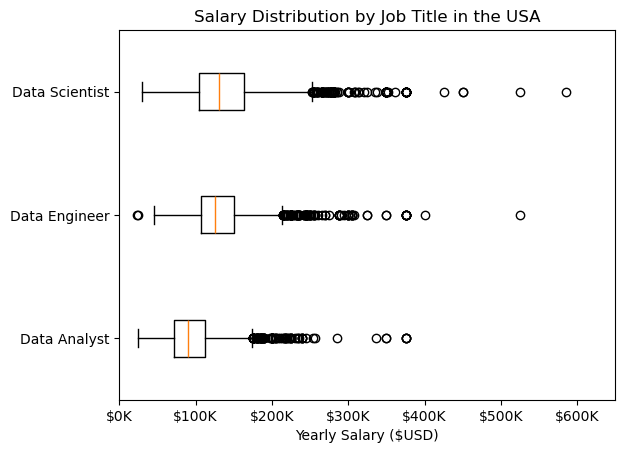

In [6]:
plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Salary Distribution by Job Title in the USA')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : '${:,.0f}K'.format(x/1000)))
plt.xlim(0, 650000)
plt.show()

## Plotting with seaborn

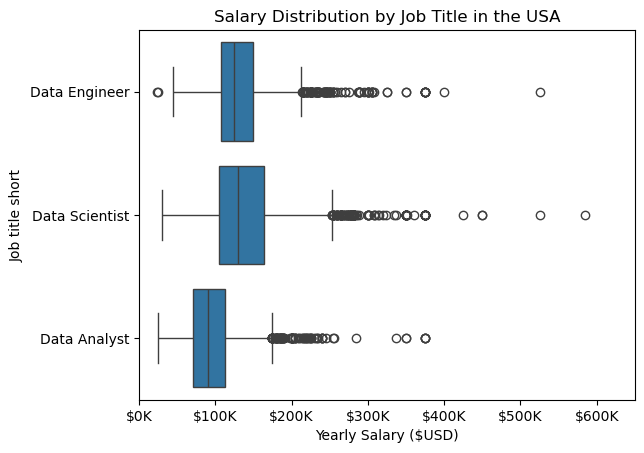

In [11]:
sns.boxplot(data=df_usa, x='salary_year_avg', y='job_title_short')
plt.title('Salary Distribution by Job Title in the USA')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Job title short')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : '${:,.0f}K'.format(x/1000)))
plt.xlim(0, 650000)
plt.show()